In [10]:
push!(LOAD_PATH, "src");
using BenchmarkTools;
using Colors, Plots;
col = palette(:default);
(cgrad::PlotUtils.ContinuousColorGradient)(xs::Vector{Vector{Float64}}) = [cgrad[x] for x in xs];
(cgrad::PlotUtils.ContinuousColorGradient)(m::Matrix{Float64}) = reshape(cgrad[m[:]], size(m));
using Gen
# using GridSlam
using Geometry
using MyUtils
# Base.Vector(p::Pose) = [p.x;p.hd];

In [3]:
include("src/cuda_raycaster_line_map.jl");

# Todo: Change cast_v4! signature and put z_ in there 
#       and replace arg by num_a and fov....
function cast_cu(ps_::CuArray, segs_::CuArray; blockdims=(16,16))
    n = size(segs_, 1)    
    m = size(ps_,1)
    z_ = Inf*CUDA.ones(m, n, 360)
    z_ = cast_v4!(segs_,ps_,z_; blockdims=blockdims)
    
    return z_
end

cast_cu (generic function with 1 method)

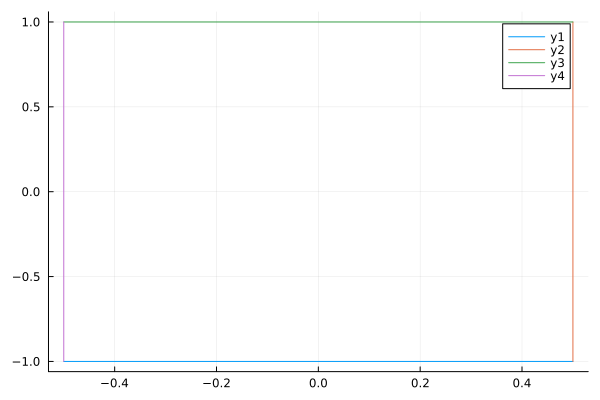

In [17]:
x = zeros(2)
a = 1
b = 2


verts = Vector{Float64}[]

verts = [x - [a;b]/2]
for off in [[a;0],[0;b],[-a;0]]
    push!(verts, verts[end] + off)
end


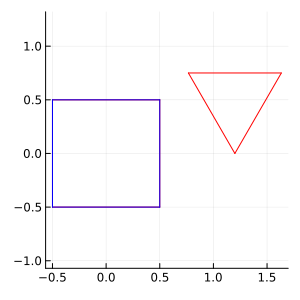

In [47]:
function box(x,a=1,b=1; rot=0) 
    verts = [x - [a;b]/2]
    for off in [[a;0],[0;b],[-a;0]]
        push!(verts, verts[end] + off)
    end
    return segments(verts)
end

function triangle(x,a=1;rot=0) 
    verts = [
        x+a*[cos(-30/360*2π + rot);sin(-30/360*2π + rot)],
        x+a*[cos( 90/360*2π + rot);sin( 90/360*2π + rot)],
        x+a*[cos(210/360*2π + rot);sin(210/360*2π + rot)]
    ]

    return segments(verts)
end


_map = box(zeros(2))
_reality = vcat(_map, triangle([1.2;0.5], 0.5; rot=π/3))

plot(size=(300,300),aspect_ratio=:equal, legend=nothing)
plot!(_reality, c=:red)
plot!(_map, c=:blue, linewidth=1)
